In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

In [2]:
# Set paths to your dataset
train_dir = 'archive/train'
val_dir = 'archive/val'
test_dir = 'archive/test'

In [3]:
# Define image size and batch size
img_height, img_width = 224, 224
batch_size = 32

In [4]:
# Define ImageDataGenerator for train, validation, and test data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 7267 images belonging to 15 classes.
Found 1550 images belonging to 15 classes.
Found 1556 images belonging to 15 classes.


In [5]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model

img_height = 224
img_width = 224
# Define input shape
input_shape = (img_height, img_width, 3)
inputs = Input(shape=input_shape)

# Load the base model with pre-trained weights and custom input shape
base_model = MobileNetV2(input_tensor=inputs, include_top=False, weights='imagenet')

# Freeze the base model layers
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Regularization
output = Dense(15, activation='softmax')(x)  # 15 classes for colors

# Build the model
model = Model(inputs=inputs, outputs=output)

# Compile model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


# Model Summary
model.summary()

C:\Users\hp\AppData\Local\Temp\ipykernel_15176\742435937.py:12: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_tensor=inputs, include_top=False, weights='imagenet')


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,277,199 (8.69 MB)

 Trainable params: 19,215 (75.06 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [6]:
base_model.trainable = True
# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
epochs = 40
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5,         # Reduce learning rate by half
    patience=3,         # Wait for 3 epochs with no improvement
    min_lr=1e-6         # Minimum learning rate to prevent getting too small
)

# Now include this callback in your model training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[reduce_lr]
)

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
227/227 ━━━━━━━━━━━━━━━━━━━━ 954s 4s/step - accuracy: 0.1054 - loss: 3.0960 - val_accuracy: 0.1868 - val_loss: 2.4987 - learning_rate: 1.0000e-05
Epoch 2/40
  1/227 ━━━━━━━━━━━━━━━━━━━━ 11:21 3s/step - accuracy: 0.2812 - loss: 2.4756

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


227/227 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2812 - loss: 2.4756 - val_accuracy: 0.0000e+00 - val_loss: 2.8538 - learning_rate: 1.0000e-05
Epoch 3/40
227/227 ━━━━━━━━━━━━━━━━━━━━ 775s 3s/step - accuracy: 0.2865 - loss: 2.2803 - val_accuracy: 0.3802 - val_loss: 2.0216 - learning_rate: 1.0000e-05
Epoch 4/40
227/227 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3438 - loss: 1.9536 - val_accuracy: 0.3571 - val_loss: 2.2268 - learning_rate: 1.0000e-05
Epoch 5/40
227/227 ━━━━━━━━━━━━━━━━━━━━ 726s 3s/step - accuracy: 0.4468 - loss: 1.7482 - val_accuracy: 0.4902 - val_loss: 1.6235 - learning_rate: 1.0000e-05
Epoch 6/40
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4375 - loss: 1.5340 - val_accuracy: 0.3571 - val_loss: 1.9547 - learning_rate: 1.0000e-05
Epoch 7/40
227/227 ━━━━━━━━━━━━━━━━━━━━ 708s 3s/step - accuracy: 0.5405 - loss: 1.4475 - val_accuracy: 0.5710 - val_loss: 1.3463 - learning_rate: 1.0000e-05
Epoch 8/40
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.68

In [8]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # Adjust based on performance
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=val_generator.samples // batch_size
)

Epoch 1/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 791s 3s/step - accuracy: 0.7425 - loss: 0.7385 - val_accuracy: 0.7891 - val_loss: 0.6089
Epoch 2/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8750 - loss: 0.3658 - val_accuracy: 0.5714 - val_loss: 1.0276
Epoch 3/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 802s 4s/step - accuracy: 0.7430 - loss: 0.7242 - val_accuracy: 0.7904 - val_loss: 0.6061
Epoch 4/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8125 - loss: 0.6700 - val_accuracy: 0.7143 - val_loss: 0.9133
Epoch 5/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 800s 4s/step - accuracy: 0.7531 - loss: 0.7024 - val_accuracy: 0.7897 - val_loss: 0.6009
Epoch 6/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7500 - loss: 0.6976 - val_accuracy: 0.6429 - val_loss: 1.0800
Epoch 7/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 769s 3s/step - accuracy: 0.7425 - loss: 0.7230 - val_accuracy: 0.7891 - val_loss: 0.6035
Epoch 8/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7188 - loss: 0.6594 - val_accuracy

In [9]:
# Unfreeze layers for fine-tuning
base_model.trainable = True
# Compile again with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,  # Fine-tuning with fewer epochs
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=val_generator.samples // batch_size
)

Epoch 1/5
227/227 ━━━━━━━━━━━━━━━━━━━━ 855s 4s/step - accuracy: 0.7507 - loss: 0.7116 - val_accuracy: 0.8001 - val_loss: 0.5751
Epoch 2/5
227/227 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8438 - loss: 0.4493 - val_accuracy: 0.6429 - val_loss: 0.7802
Epoch 3/5
227/227 ━━━━━━━━━━━━━━━━━━━━ 781s 3s/step - accuracy: 0.7585 - loss: 0.6919 - val_accuracy: 0.7988 - val_loss: 0.5574
Epoch 4/5
227/227 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5625 - loss: 1.0109 - val_accuracy: 0.7857 - val_loss: 0.5817
Epoch 5/5
227/227 ━━━━━━━━━━━━━━━━━━━━ 776s 3s/step - accuracy: 0.7676 - loss: 0.6699 - val_accuracy: 0.8047 - val_loss: 0.5447


In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

48/48 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.7877 - loss: 0.5494
Test Accuracy: 79.23%


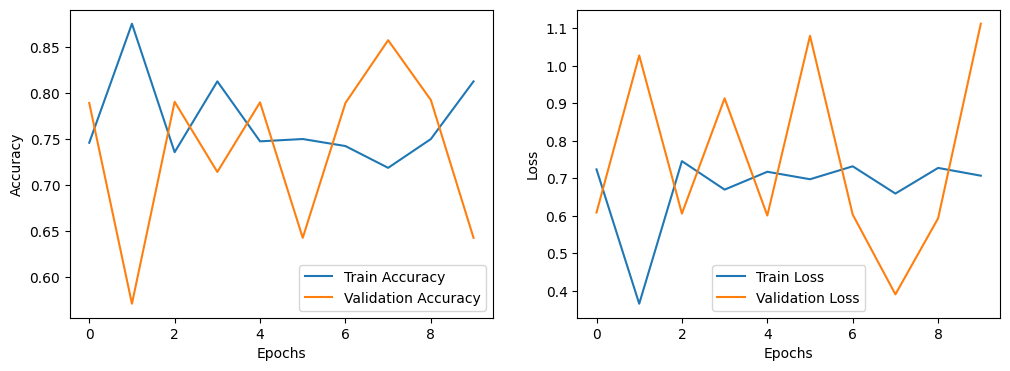

In [11]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [12]:
# Save the model
model.save('car_color_classification_model.h5')
model.save('car_color_classification_model.keras')

In [17]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('car_color_classification_model.h5')  # Replace with your model's file path

# Load and preprocess the image
def prepare_image(image_path):
    img_height, img_width = 224, 224  # Match the model input dimensions
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = cv2.resize(image, (img_width, img_height))  # Resize the image
    image = image / 255.0  # Normalize pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Predict function
def predict_color(image_path):
    processed_image = prepare_image(image_path)
    prediction = model.predict(processed_image)
    predicted_class = np.argmax(prediction, axis=1)  # Get the index of the highest probability
    return predicted_class, prediction

# Load your class labels (mapping indices to colors)
class_labels = {
    0: 'Beige', 1: 'Black', 2: 'Blue', 3: 'Brown', 4: 'Gold',
    5: 'Green', 6: 'Grey', 7: 'Orange', 8: 'Pink', 9: 'Purple',
    10: 'Red', 11: 'Silver', 12: 'Tan', 13: 'White', 14: 'Yellow'
}

# Example usage
image_path = 'archive/test/blue/01401b6d76.jpg'  # Replace with the actual image path
predicted_class, prediction = predict_color(image_path)

print(f"Predicted Class: {class_labels[predicted_class[0]]}")
print(f"Prediction Probabilities: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: Blue
Prediction Probabilities: [[3.1058011e-05 6.6885805e-05 9.9637234e-01 1.9176212e-05 6.2927364e-05
  5.3635649e-05 6.0724375e-05 2.8934595e-05 4.1176434e-05 3.1114758e-03
  2.2127009e-05 4.3741635e-05 2.6814487e-05 3.3031092e-06 5.5723391e-05]]
